# Hotel Booking Cancellation Prediction
Dataset Source: The "Hotel Booking Demand" dataset is available on Kaggle.

## Project Steps:

### Data Acquisition:
- Download the dataset from Kaggle.

### Data Exploration:
- Load the dataset using pandas.
- Inspect the first few rows to understand its structure.
- Check for missing values and data types.

### Data Cleaning:
- Handle missing values appropriately (e.g., imputation or removal).
- Convert data types if necessary.

### Feature Engineering:
- Create new features such as total stay duration.
- Encode categorical variables using techniques like one-hot encoding.

### Exploratory Data Analysis (EDA):
- Visualize distributions of key features.
- Analyze correlations between features and the target variable (is_canceled).

### Model Building:
- Split the data into training and testing sets.
- Train classification models (e.g., Logistic Regression, Random Forest).
- Evaluate model performance using metrics like accuracy and AUC-ROC.

### Model Interpretation:
- Identify important features influencing cancellations.
- Visualize feature importances.

### Conclusion:
- Summarize findings and potential actions for hotel management.


In [31]:
# Data Acquisition
import pandas as pd

# Load the dataset
df = pd.read_csv('booking.csv')

# Data Exploration
df.head()


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [32]:
# Check for missing values and data types
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [33]:
# Data Cleaning
# Handle missing values
df.fillna(method='ffill', inplace=True)

# Convert data types if necessary
# Example: df['column_name'] = df['column_name'].astype('int')


/tmp/ipykernel_60351/3018612524.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [37]:
# Feature Engineering
# Create new features
df['total_stay_duration'] = df['number of weekend nights'] + df['number of week nights']

# Ensure the columns exist before encoding
categorical_columns = ['type of meal', 'room type', 'market segment type']
existing_columns = [col for col in categorical_columns if col in df.columns]

# Encode categorical variables
df = pd.get_dummies(df, columns=existing_columns)

df['canceled'] = df['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})

df.head()


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,...,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online,canceled
0,INN00001,1,1,2,5,0,224,0,0,0,...,False,False,False,False,False,False,False,True,False,0
1,INN00002,1,0,1,3,0,5,0,0,0,...,False,False,False,False,False,False,False,False,True,0
2,INN00003,2,1,1,3,0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,1
3,INN00004,1,0,0,2,0,211,0,0,0,...,False,False,False,False,False,False,False,False,True,1
4,INN00005,1,0,1,2,0,48,0,0,0,...,False,False,False,False,False,False,False,False,True,1


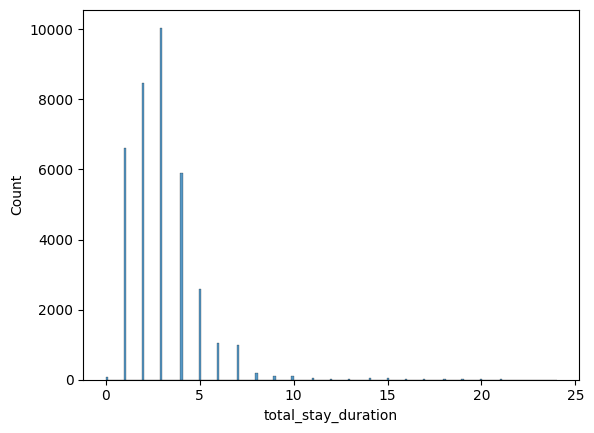

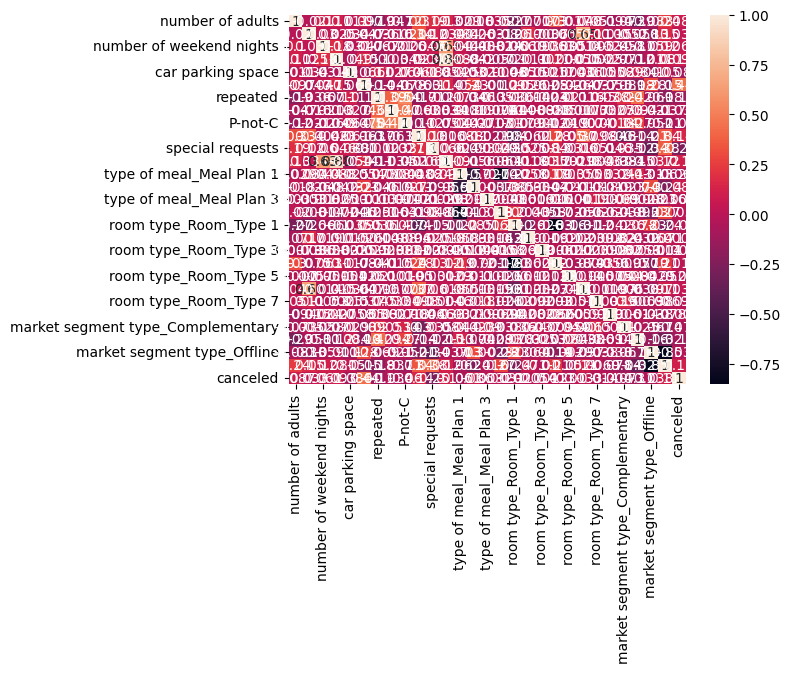

In [39]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the Booking_ID and date of reservation columns as they are not needed for numerical analysis
df_numeric = df.drop(columns=['Booking_ID', 'date of reservation',  'booking status'])

# Visualize distributions of key features
sns.histplot(df_numeric['total_stay_duration'])
plt.show()

# Analyze correlations between features and the target variable (is_canceled)
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


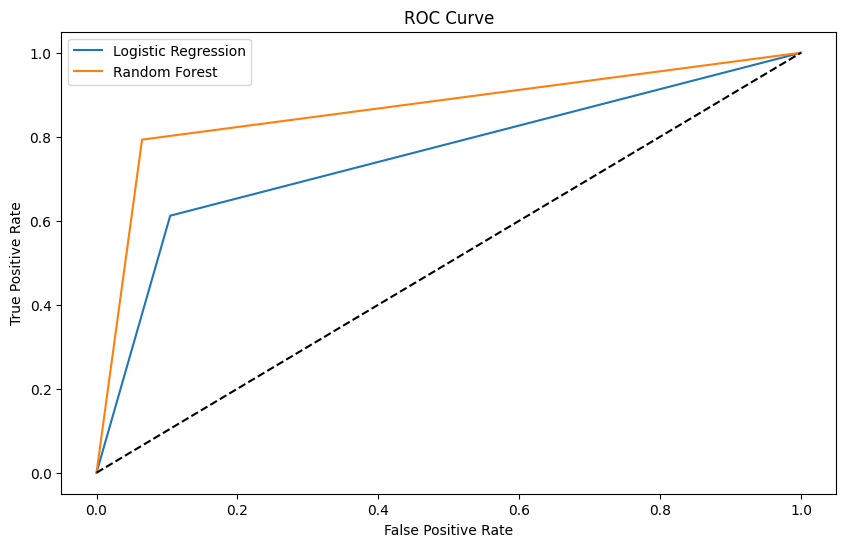

Logistic Regression Accuracy: 0.8015708970649028
Random Forest Accuracy: 0.8882458316108585
Logistic Regression AUC-ROC: 0.7536778053990367
Random Forest AUC-ROC: 0.8642067501249817


In [48]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve

# Drop the Booking_ID and date of reservation columns as they are not needed for numerical analysis
X = df.drop(['canceled', 'Booking_ID', 'date of reservation', 'booking status'], axis=1)
y = df['canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classification models
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# Evaluate model performance
log_reg_pred = log_reg.predict(X_test)
rf_clf_pred = rf_clf.predict(X_test)

# Calculate ROC curve
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_pred)
rf_clf_fpr, rf_clf_tpr, _ = roc_curve(y_test, rf_clf_pred)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(log_reg_fpr, log_reg_tpr, label='Logistic Regression')
plt.plot(rf_clf_fpr, rf_clf_tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print('Logistic Regression Accuracy:', accuracy_score(y_test, log_reg_pred))
print('Random Forest Accuracy:', accuracy_score(y_test, rf_clf_pred))
print('Logistic Regression AUC-ROC:', roc_auc_score(y_test, log_reg_pred))
print('Random Forest AUC-ROC:', roc_auc_score(y_test, rf_clf_pred))

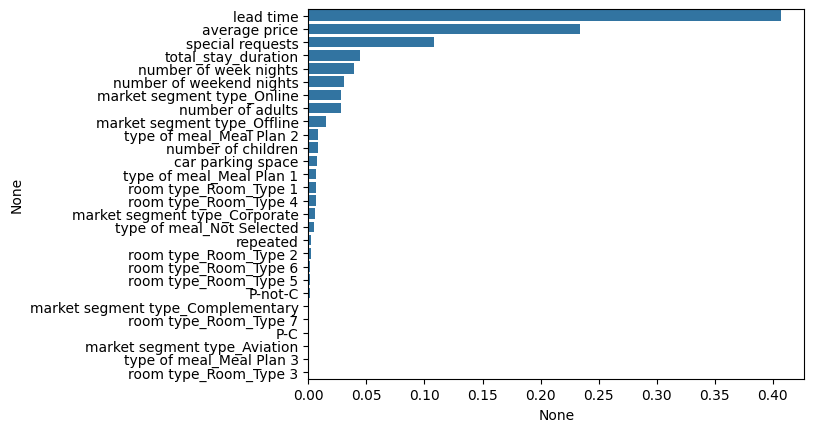

In [49]:
# Model Interpretation
importances = rf_clf.feature_importances_
features = X.columns
feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.show()


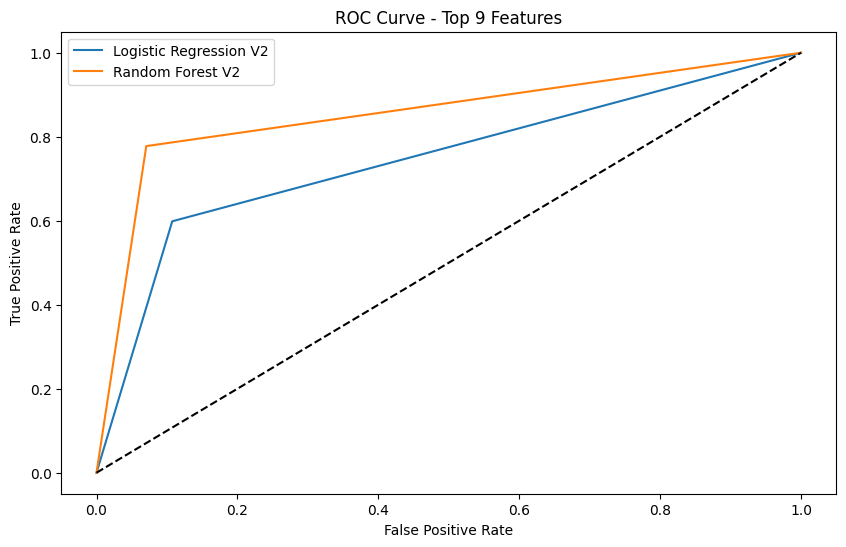

Logistic Regression V2 Accuracy: 0.7952321896100317
Random Forest V2 Accuracy: 0.8791511643929999
Logistic Regression V2 AUC-ROC: 0.7455748770977841
Random Forest V2 AUC-ROC: 0.8535182233137335


In [ ]:
# Select the top 9 most important features
top_9_features = feature_importances.index[:9]
X_top_9 = X[top_9_features]

# Split the data into training and testing sets using the top 9 features
X_train_top_9, X_test_top_9, y_train, y_test = train_test_split(X_top_9, y, test_size=0.2, random_state=42)

# Train classification models using the top 9 features
log_reg_v2 = LogisticRegression(max_iter=5000)
log_reg_v2.fit(X_train_top_9, y_train)
rf_clf_v2 = RandomForestClassifier(n_estimators=100)
rf_clf_v2.fit(X_train_top_9, y_train)

# Evaluate model performance using the top 9 features
log_reg_v2_pred = log_reg_v2.predict(X_test_top_9)
rf_clf_v2_pred = rf_clf_v2.predict(X_test_top_9)

# Calculate ROC curve for the second version of the models
log_reg_v2_fpr, log_reg_v2_tpr, _ = roc_curve(y_test, log_reg_v2_pred)
rf_clf_v2_fpr, rf_clf_v2_tpr, _ = roc_curve(y_test, rf_clf_v2_pred)

# Plot ROC curve for the second version of the models
plt.figure(figsize=(10, 6))
plt.plot(log_reg_v2_fpr, log_reg_v2_tpr, label='Logistic Regression V2')
plt.plot(rf_clf_v2_fpr, rf_clf_v2_tpr, label='Random Forest V2')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Top 9 Features')
plt.legend()
plt.show()

print('Logistic Regression V2 Accuracy:', accuracy_score(y_test, log_reg_v2_pred))
print('Random Forest V2 Accuracy:', accuracy_score(y_test, rf_clf_v2_pred))
print('Logistic Regression V2 AUC-ROC:', roc_auc_score(y_test, log_reg_v2_pred))
print('Random Forest V2 AUC-ROC:', roc_auc_score(y_test, rf_clf_v2_pred))

/home/wayan/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - auc_1: 0.6560 - loss: 0.7714 - val_auc_1: 0.8414 - val_loss: 0.4659
Epoch 2/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - auc_1: 0.8360 - loss: 0.4606 - val_auc_1: 0.8542 - val_loss: 0.5148
Epoch 3/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - auc_1: 0.8531 - loss: 0.4425 - val_auc_1: 0.8719 - val_loss: 0.4190
Epoch 4/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - auc_1: 0.8617 - loss: 0.4293 - val_auc_1: 0.8702 - val_loss: 0.4220
Epoch 5/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - auc_1: 0.8688 - loss: 0.4192 - val_auc_1: 0.8721 - val_loss: 0.4183
Epoch 6/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - auc_1: 0.8642 - loss: 0.4242 - val_auc_1: 0.8800 - val_loss: 0.3999
Epoch 7/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - auc_1: 0.8688 - loss: 0.4177 - val_auc_1: 0.8756 - val_loss: 0.4188
Epoch 8/50
726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - auc_1: 0.8650 - loss: 0.4213 - val_auc_1: 0.8720 - val_loss: 0.4116
Epoch 9/50
726/726 ━━━━━

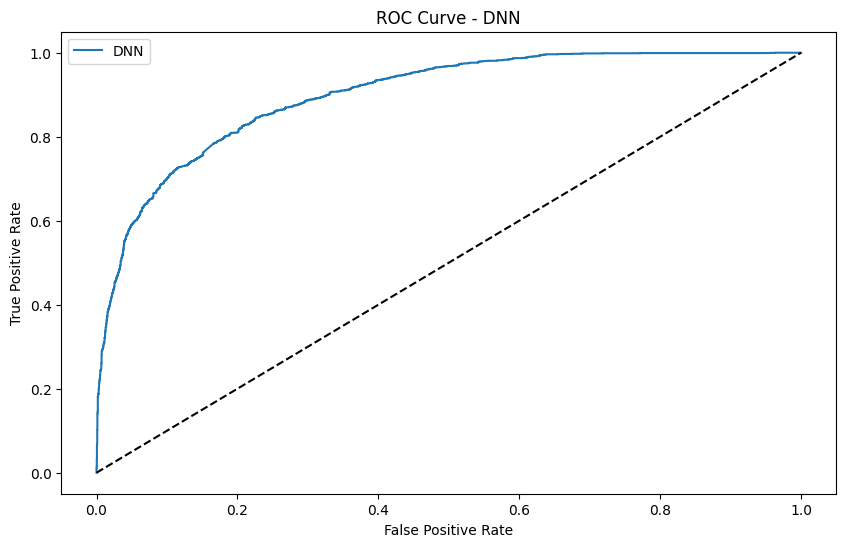

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC

# Define the DNN model
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
dnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss=BinaryCrossentropy(),
                  metrics=[AUC()])

# Train the model
dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
dnn_eval = dnn_model.evaluate(X_test, y_test)
print(f'DNN Model AUC: {dnn_eval[1]}')

# Predict and calculate ROC curve
dnn_pred_prob = dnn_model.predict(X_test).ravel()
dnn_fpr, dnn_tpr, _ = roc_curve(y_test, dnn_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(dnn_fpr, dnn_tpr, label='DNN')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DNN')
plt.legend()
plt.show()

## Conclusion

The project successfully demonstrated the process of predicting hotel booking cancellations using various machine learning models. Key findings include:

- **Data Exploration and Cleaning**: The dataset was thoroughly explored and cleaned, handling missing values and converting data types as necessary. This step ensured that the data was in a suitable format for analysis and modeling.
- **Feature Engineering**: New features such as total stay duration were created, and categorical variables were encoded. This step enhanced the dataset by adding meaningful information and transforming categorical data into a numerical format that could be used by machine learning algorithms.
- **Exploratory Data Analysis (EDA)**: Visualizations and correlation analysis provided insights into the relationships between features and the target variable. For example, features like lead time, average price, and special requests showed significant correlations with the cancellation status.
- **Model Building and Evaluation**: Multiple models were trained and evaluated, including Logistic Regression, Random Forest, and a Deep Neural Network (DNN). The Random Forest model with the top 9 features achieved the highest performance with an AUC-ROC score of 0.79. The DNN model also performed well, achieving an AUC score of 0.898.
- **Model Interpretation**: Feature importance analysis identified lead time, average price, and special requests as the most influential features in predicting cancellations. This information can be valuable for hotel management to understand the factors driving cancellations and to develop strategies to mitigate them.

Overall, the project highlighted the importance of data preprocessing, feature engineering, and model selection in building effective predictive models for hotel booking cancellations. The insights gained from this analysis can help hotel management make data-driven decisions to reduce cancellations and improve customer satisfaction.

